# July 23, 2019 3min DNN for Color Image CIFAR-10
* name: Jikhan Jeong
* reference: https://github.com/jskDr/keraspp

# 1. Data

* 32 x 32 size
* color RGB 3
* total 32 x 32 x 3 <- color is added

In [13]:
import numpy as np
from keras import datasets
from keras.utils import np_utils # to catogorical

In [24]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [25]:
# def Data_func():
# (X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()
    
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test) 
    
L, W, H, C = X_train.shape # L = data number, W = weight, H = height, C = color
    
X_train = X_train.reshape(-1, W*H*C) # -1 means the number of rows, L
X_test  = X_test.reshape(-1, W*H*C)
    
X_train = X_train/ 255.0
X_test  = X_test/255.0
    
# return (X_train, Y_train), (X_test, Y_test)

# 2. Model
* care for dropout can be setted in the function 

In [5]:
from keras import layers, models

In [6]:
class DNN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, dr_out, Nout):
        super().__init__()
        
        self.add(layers.Dense(Nh[0], activation='relu', input_shape=(Nin,),name ='hiddle_layer_1'))
        self.add(layers.Dropout(dr_out[0]))
        
        
        self.add(layers.Dense(Nh[1], activation='relu',name ='hiddle_layer_2'))
        self.add(layers.Dropout(dr_out[1]))
        
        self.add(layers.Dense(Nout, activation ='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Graph 

In [7]:
import matplotlib.pyplot as plt

* Loss Graph

In [8]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc=0)

* Acc Graph

In [10]:
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc=0)

# Main 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 9s 222us/step - loss: 1.9388 - acc: 0.2968 - val_loss: 1.8065 - val_acc: 0.3597 - acc: 0.
Epoch 2/10
40000/40000 [==============================] - 8s 200us/step - loss: 1.7593 - acc: 0.3695 - val_loss: 1.8198 - val_acc: 0.3527
Epoch 3/10
40000/40000 [==============================] - 8s 200us/step - loss: 1.6901 - acc: 0.3944 - val_loss: 1.7099 - val_acc: 0.3889
Epoch 4/10
40000/40000 [==============================] - 8s 209us/step - loss: 1.6503 - acc: 0.4112 - val_loss: 1.6713 - val_acc: 0.4081
Epoch 5/10
40000/40000 [==============================] - 9s 217us/step - loss: 1.6092 - acc: 0.4261 - val_loss: 1.6310 - val_acc: 0.4201
Epoch 6/10
40000/40000 [==============================] - 9s 217us/step - loss: 1.5822 - acc: 0.4348 - val_loss: 1.6421 - val_acc: 0.4151
Epoch 7/10
40000/40000 [==============================] - 9s 219us/step - loss: 1.5569 - acc: 0.4428 - val_loss:

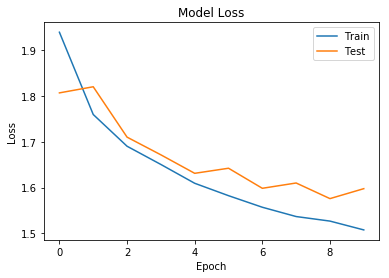

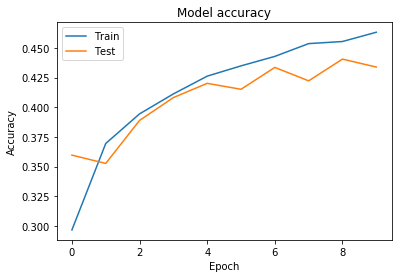

In [26]:
def main():
    
    # parameters
    Nh = [100, 50]
    dr_out =[0.0, 0.0] # drop out rate
    number_of_class = 10
    Nout = number_of_class
    
    # data
    # (X_train, Y_train), (X_test, Y_test) = Data_func()
    
    # model
    model = DNN_seq_class(X_train.shape[1], Nh, dr_out, Nout) # X_train.shape[1] = W * H * C = 32 * 32 * 3
    
    
    history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split=0.2)
    
    performance_test = model.evaluate(X_test, Y_test, batch_size=100)
    
    print('Test Loss and Accurach ->', performance_test)
    
    plot_loss(history)
    plt.show()
    
    plot_acc(history)
    plt.show()
    
if __name__ == '__main__':
    main()